<a href="https://colab.research.google.com/github/zermurachi/childhood_adult_obesity/blob/main/Analysis_children_male_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Define the policy date
policy_date = 2007
years_before, years_after = 3, 3
gender = 'male'

In [37]:
# prompt: Open the data file as a dataframe located in my Drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv(f'/content/drive/MyDrive/These/data/{gender}-obesity-rates.csv')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   year  obesity_rate
0  1975           3.8
1  1976           3.9
2  1977           4.1
3  1978           4.2
4  1979           4.4


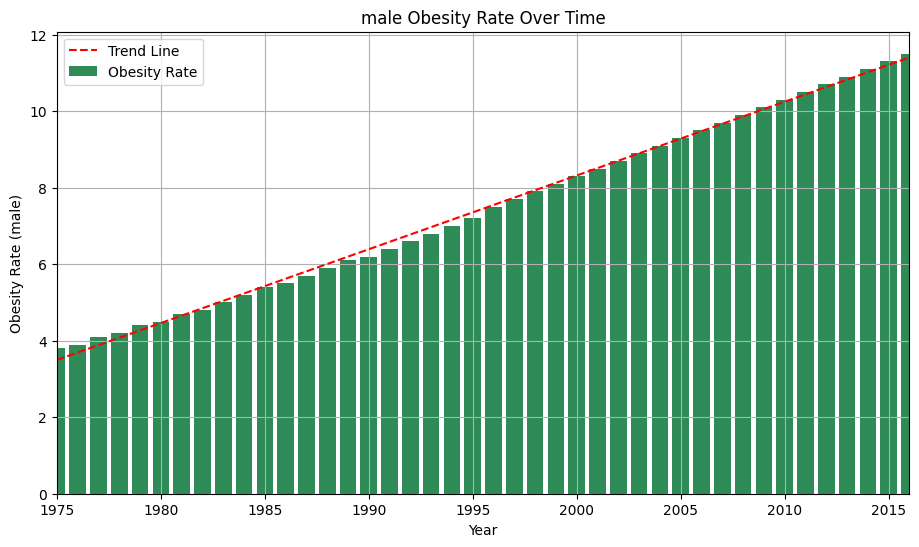

In [38]:
# prompt: Represent in a graph bar of df Obesity_Rate_Female over Year colon. choose a nice color but not blue. add a slope rerpresentation. add every year from 1975 up to 2016 on the graph

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded as in the previous code

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the obesity_rate over Year with a bar chart
ax.bar(df['year'], df['obesity_rate'], color='seagreen', label='Obesity Rate')

# Calculate and plot the linear regression line (slope)
z = np.polyfit(df['year'], df['obesity_rate'], 1)
p = np.poly1d(z)
ax.plot(df['year'], p(df['year']), "r--", label='Trend Line')


# Set the x-axis limits to include all years from 1975 to 2016
ax.set_xlim(1975, 2016)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel(f'Obesity Rate ({gender})')
ax.set_title(f'{gender} Obesity Rate Over Time')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


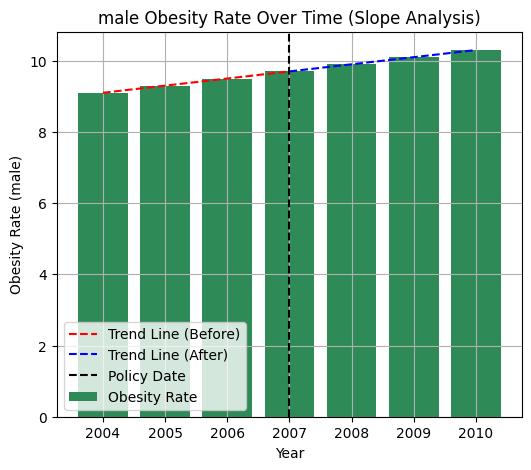

Slope before policy: 0.20
Slope after policy: 0.20


In [39]:
# prompt: Based on the dataframe that we have, do a slope analysis based on a policy in date of 2007 and analyze 3 years before and after it. Display results in a graph of your choice

# Assuming df is already loaded as in the previous code

# Filter the data for the relevant period
start_year = policy_date - years_before
end_year = policy_date + years_after
df_filtered = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the Obesity_Rate_Female over Year with a bar chart
ax.bar(df_filtered['year'], df_filtered['obesity_rate'], color='seagreen', label='Obesity Rate')

# Calculate and plot the linear regression line (slope) before the policy
df_before = df_filtered[df_filtered['year'] <= policy_date]
z_before = np.polyfit(df_before['year'], df_before['obesity_rate'], 1)
p_before = np.poly1d(z_before)
ax.plot(df_before['year'], p_before(df_before['year']), "r--", label='Trend Line (Before)')

# Calculate and plot the linear regression line (slope) after the policy
df_after = df_filtered[df_filtered['year'] >= policy_date]
z_after = np.polyfit(df_after['year'], df_after['obesity_rate'], 1)
p_after = np.poly1d(z_after)
ax.plot(df_after['year'], p_after(df_after['year']), "b--", label='Trend Line (After)')

# Add a vertical line to indicate the policy date
ax.axvline(x=policy_date, color='black', linestyle='--', label='Policy Date')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel(f'Obesity Rate ({gender})')
ax.set_title(f'{gender} Obesity Rate Over Time (Slope Analysis)')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

# Print the slope values
print(f"Slope before policy: {z_before[0]:.2f}")
print(f"Slope after policy: {z_after[0]:.2f}")
